>>## Task 4
- <b>Make a bar graph</b>
    - On the X axis, put the years
    - On the Y axis, put the number of papers uploaded
    - Bars should be grouped by category

<b>Importing required libraries</b> 

In [1]:
#importing required libraries and functions
import pandas as pd
import matplotlib.pyplot as plt

<b> Loading the data from the CSV file</b>

In [2]:
#loading the data from the CSV file
metadata_df = pd.read_csv('arxiv_metadata.csv')

<b> Code to group the data based on category and published year and count papers published in each year for each category</b>

In [3]:
#grouping the data by category and year as we need to data of how many papers published each year in each category
#metadata_df['published_date'].str[:4]--> it retrives first four char from the published_date column data as first four represents the published year
grouped_data = metadata_df.groupby(['primary_category', metadata_df['published_date'].str[:4]])

#calculating the count of papers for each group using aggregate function count
grouped_data = grouped_data.agg({'title': 'count'}).reset_index()

#renaming the title column name to the appropriate name papers_count as it represents count of papers
grouped_data = grouped_data.rename(columns={'title': 'papers_count'})
#print("grouped_data\n", grouped_data)

<b> Code for ploting the bar graph of number of published papers for each year from 2018 to 2022 for each category</b>

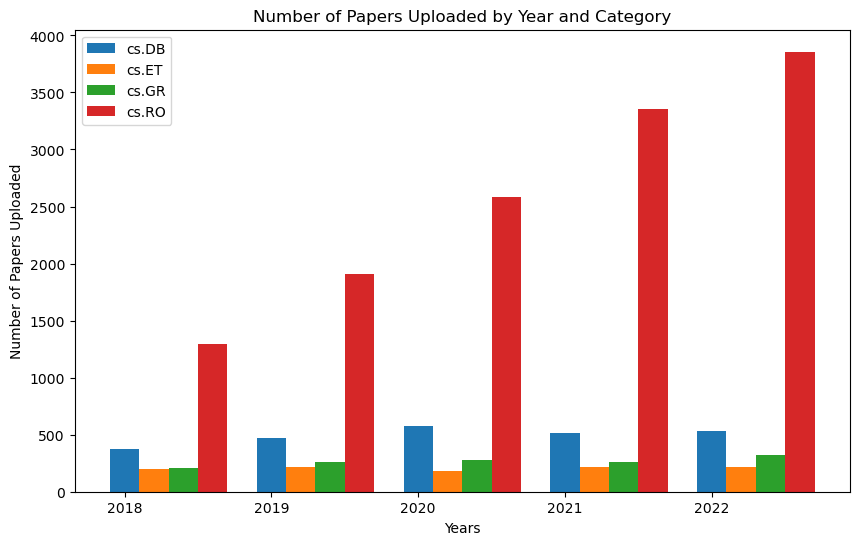

In [4]:
#setting the figure size for better display of the graph
plt.figure(figsize=(10, 6))

#getting unique categories from df to loop through each category
categories = grouped_data['primary_category'].unique()
#iterate over each unique category
for i, category in enumerate(categories):
    #getting data for the current category
    category_data = grouped_data[grouped_data['primary_category'] == category]
    #print(category_data)
    #setting x and y values for the bar plot
    x = category_data['published_date'].astype(int)
    y = category_data['papers_count']
    
    #setting the width of each bar for each category
    width = 0.2
    
    #adjusting the x position for each category to separate the bars
    x_pos = [x_val + i * width for x_val in x]
    
    #ploting the bar graph
    plt.bar(x_pos, y, width=width, label=category)
    
    
#setting the title and labels for the bar graph
plt.title('Number of Papers Uploaded by Year and Category')
plt.xlabel('Years')
plt.ylabel('Number of Papers Uploaded')

#adding legend to show which bar represents which category data
plt.legend()

#showing the graph
plt.show()
